In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:
# OpenWeatherMap API Key
api_key = "6e5dfbcecf0c20f762a04f8ed78436d2"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=provideniya
Processing Record 2 of Set 1 | senno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=senno
Processing Record 3 of Set 1 | gubkinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=gubkinskiy
Processing Record 4 of Set 1 | ottawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=ottawa
Processing Record 5 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=punta%20arenas
Processing Record 6 of Set 1 | pa sang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=pa%20sang
Processing Record 

Processing Record 4 of Set 2 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=tuatapere
Processing Record 5 of Set 2 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=bengkulu
City not found. Skipping...
Processing Record 6 of Set 2 | nueva gerona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=nueva%20gerona
Processing Record 7 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=barrow
Processing Record 8 of Set 2 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=ribeira%20grande
Processing Record 9 of Set 2 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=gat
Processing Record 10 of Set 2 | khatanga
http://

Processing Record 7 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=yellowknife
Processing Record 8 of Set 3 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=portland
Processing Record 9 of Set 3 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=bredasdorp
Processing Record 10 of Set 3 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=bilma
Processing Record 11 of Set 3 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=hualmay
Processing Record 12 of Set 3 | sogne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=sogne
Processing Record 13 of Set 3 | byron bay
http://api.openweathermap.org/data/2.5/weather?

Processing Record 11 of Set 4 | klamath falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=klamath%20falls
Processing Record 12 of Set 4 | burton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=burton
Processing Record 13 of Set 4 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=nanortalik
Processing Record 14 of Set 4 | sirfa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=sirfa
City not found. Skipping...
Processing Record 15 of Set 4 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=batagay-alyta
Processing Record 16 of Set 4 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=taolanaro
City not found. Skipping...
Processi

Processing Record 13 of Set 5 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=belushya%20guba
City not found. Skipping...
Processing Record 14 of Set 5 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=lakes%20entrance
Processing Record 15 of Set 5 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=kavieng
Processing Record 16 of Set 5 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=fort%20nelson
Processing Record 17 of Set 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=saldanha
Processing Record 18 of Set 5 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=nantucket
Processing Record 19

Processing Record 15 of Set 6 | palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=palana
Processing Record 16 of Set 6 | nha trang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=nha%20trang
Processing Record 17 of Set 6 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=amderma
City not found. Skipping...
Processing Record 18 of Set 6 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=caravelas
Processing Record 19 of Set 6 | jiangkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=jiangkou
Processing Record 20 of Set 6 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=egvekinot
Processing Record 21 of Set 6 | novopavlovka
http://

Processing Record 18 of Set 7 | smoky lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=smoky%20lake
Processing Record 19 of Set 7 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=marcona
City not found. Skipping...
Processing Record 20 of Set 7 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=sao%20jose%20da%20coroa%20grande
Processing Record 21 of Set 7 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=tura
Processing Record 22 of Set 7 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=berlevag
Processing Record 23 of Set 7 | nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=nador
Processing Record 24 of 

Processing Record 21 of Set 8 | cherdyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=cherdyn
Processing Record 22 of Set 8 | ust-kulom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=ust-kulom
Processing Record 23 of Set 8 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=ust-barguzin
Processing Record 24 of Set 8 | crab hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=crab%20hill
City not found. Skipping...
Processing Record 25 of Set 8 | aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=aripuana
Processing Record 26 of Set 8 | astipalaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=astipalaia
City not found. Skipping...
Processing

Processing Record 24 of Set 9 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=lompoc
Processing Record 25 of Set 9 | rovenki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=rovenki
Processing Record 26 of Set 9 | brownsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=brownsville
Processing Record 27 of Set 9 | bato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=bato
Processing Record 28 of Set 9 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=chapais
Processing Record 29 of Set 9 | san ignacio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=san%20ignacio
Processing Record 30 of Set 9 | atherton
http://api.openweathermap.org/data/2.5/weat

Processing Record 27 of Set 10 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=cabo%20san%20lucas
Processing Record 28 of Set 10 | gurgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=gurgan
City not found. Skipping...
Processing Record 29 of Set 10 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=karratha
Processing Record 30 of Set 10 | warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=warqla
City not found. Skipping...
Processing Record 31 of Set 10 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=flinders
Processing Record 32 of Set 10 | nan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=nan
Processing Record 33 o

Processing Record 30 of Set 11 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=huarmey
Processing Record 31 of Set 11 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=ostrovnoy
Processing Record 32 of Set 11 | pudozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=pudozh
Processing Record 33 of Set 11 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=karaul
City not found. Skipping...
Processing Record 34 of Set 11 | lifford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=lifford
Processing Record 35 of Set 11 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=kalmunai
Processing Record 36 of Set 11 | muriwai beach
http://api.

Processing Record 33 of Set 12 | cartagena del chaira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=cartagena%20del%20chaira
Processing Record 34 of Set 12 | hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=hokitika
Processing Record 35 of Set 12 | tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=tomatlan
Processing Record 36 of Set 12 | abeche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=abeche
Processing Record 37 of Set 12 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=half%20moon%20bay
Processing Record 38 of Set 12 | khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e5dfbcecf0c20f762a04f8ed78436d2&q=khani
Processing Record 39 of Set 12 | algiers
htt

In [4]:
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,provideniya,63,RU,1566618818,53,64.42,-173.23,55.53,3.91
1,senno,84,RU,1566618818,67,57.76,27.95,62.60,8.95
2,gubkinskiy,100,RU,1566618819,93,64.43,76.50,56.74,23.47
3,ottawa,40,CA,1566618819,63,45.42,-75.69,62.01,11.41
4,punta arenas,90,CL,1566618819,93,-53.16,-70.91,39.20,11.41


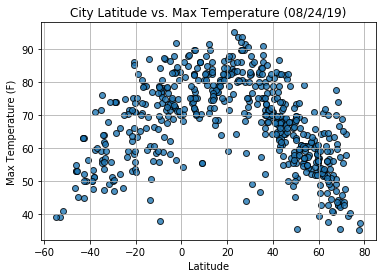

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

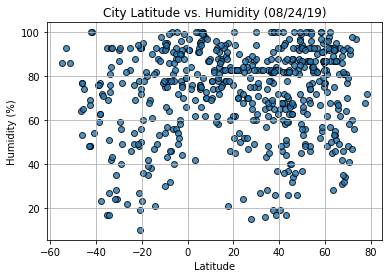

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

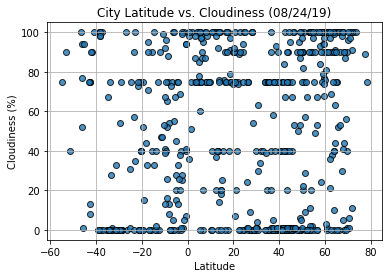

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

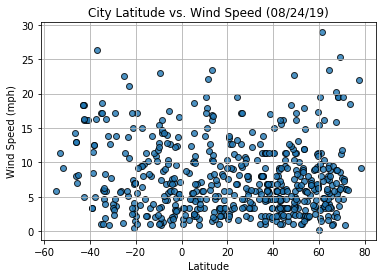

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()